# Section 6 - Advanced Visualization
## Category Data Type, JointPlots, Histograms, Stacked Histograms, KDE Plots, Subplots(), Violinplots vs. Boxplots, Facet Grids, Coordinates and Diagonals

---

## Categorical Data

In [15]:
import pandas as pd
import os

In [16]:
os.getcwd()

'C:\\Users\\cskip\\Documents\\Python Programming Courses\\Python Programming A-Z\\Section 6 - Advanced Visualization'

In [17]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [18]:
len(movies)        #check the length of the file

559

In [19]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [20]:
movies.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [21]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

#### Rename columns

In [27]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', \
                  'BudgetMillions', 'Year']

In [28]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [29]:
movies.info()
#two objects, four integers
#do we really want to treat Year as an integer?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [30]:
movies.describe()
#it doesn't make sense for Year to have stats...since they're really categorical data

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


### Convert Variables into Categorical Data

In [159]:
movies['Film'] # or movies.Film

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: category
Categories (559, object): ['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours', ..., 'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper']

In [32]:
movies.Film.astype('category')

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: category
Categories (559, object): ['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours', ..., 'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper']

#### DATA.COLUMN.astype('category')

In [33]:
movies.Film = movies.Film.astype('category')        #convert Film into a categorical variables

In [34]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [35]:
movies.info()
#now Film is recognized in a category (called factors in R)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [36]:
#convert both into categorical variables
movies.Genre = movies.Genre.astype('category')          
movies.Year = movies.Year.astype('category')

In [37]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


#### How to determine the unique values in a categorical variable:

In [38]:
#if you want to know the unique values in a categorical variable:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [39]:
movies.Film.cat.categories

Index(['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours',
       '17 Again ', '2012', '27 Dresses', '30 Days of Night',
       '30 Minutes or Less', '50/50',
       ...
       'Yes Man', 'Yogi Bear', 'You Again', 'You Don't Mess with the Zohan',
       'You Will Meet a Tall Dark Stranger', 'Your Highness',
       'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper'],
      dtype='object', length=559)

In [40]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

## JointPlots

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Jointplots - show stats (bivariate distributions) along with the scatterplot

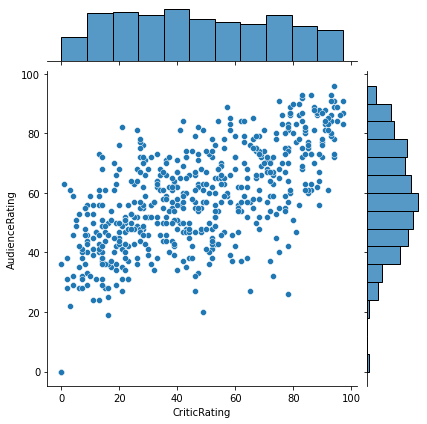

In [42]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')
#AudienceRating looks more normally distributed than CriticRating

### Chart #1 for report

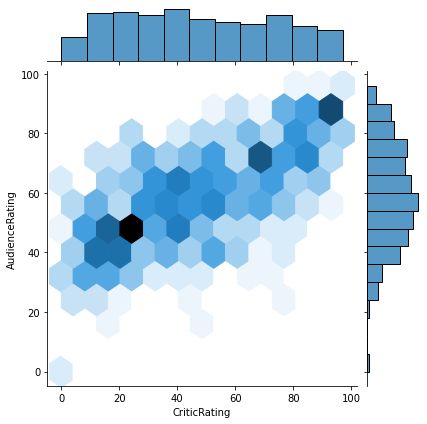

In [43]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')
#hex will identify clusters for you! Neat!

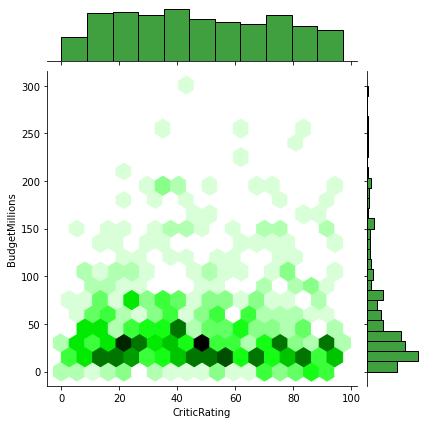

In [44]:
q = sns.jointplot(data=movies, x='CriticRating', y='BudgetMillions', kind='hex', color='Green')

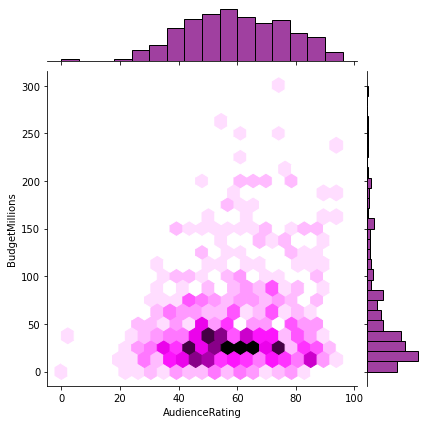

In [45]:
q = sns.jointplot(data=movies, x='AudienceRating', y='BudgetMillions', kind='hex', color='Purple')

---

## Histograms

#### Already know this method (Seaborn):

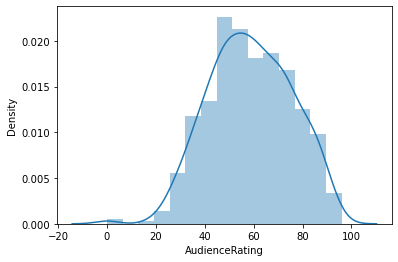

In [46]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

#### sns.set_style('darkgrid') or sns.set_style('white')

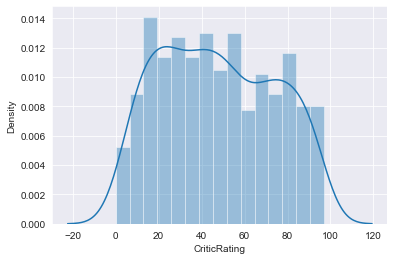

In [47]:
sns.set_style('darkgrid')
m2 = sns.distplot(movies.CriticRating, bins=15)

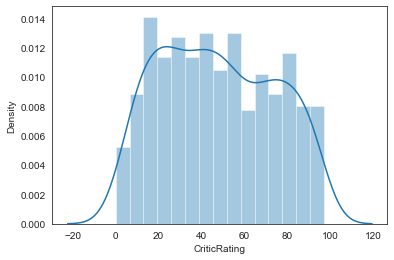

In [48]:
sns.set_style('white')
m2 = sns.distplot(movies.CriticRating, bins=15)

#### What would this^ same distribution look like without Seaborn? pyplot examples:

### Chart #2 for report:

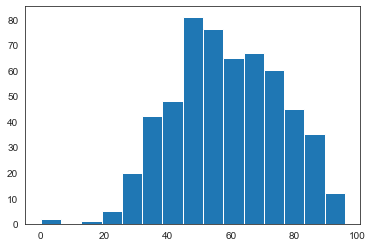

In [49]:
sns.set_style('white')
n1 = plt.hist(movies.AudienceRating, bins=15)

### Chart #3 for report:

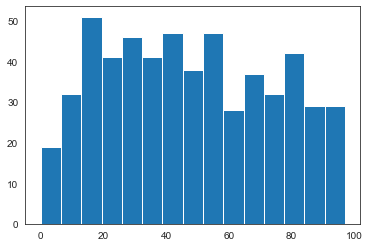

In [50]:
sns.set_style('white')
n1 = plt.hist(movies.CriticRating, bins=15)

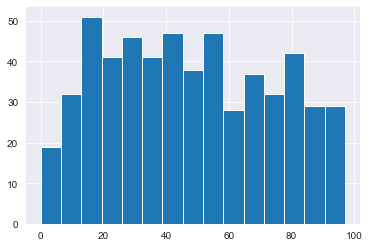

In [51]:
sns.set_style('darkgrid')
n1 = plt.hist(movies.CriticRating, bins=15)

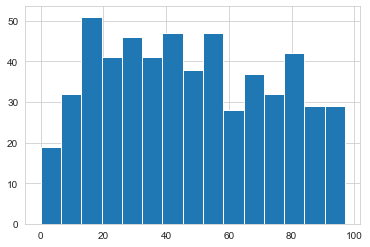

In [52]:
sns.set_style('whitegrid')
n1 = plt.hist(movies.CriticRating, bins=15)

Notice that Critic Ratings are not normally distributed like Audience Ratings because critics have to follow certain rules

---

## Stacked Histograms

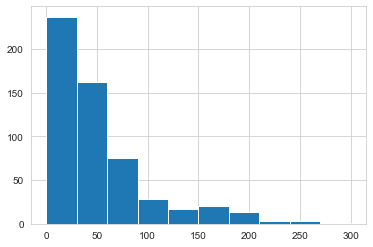

In [53]:
h1 = plt.hist(movies.BudgetMillions)

In [54]:
#create filter as a new DF
movies[movies.Genre == 'Action']

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
2,12 Rounds,Action,30,52,20,2009
5,2012,Action,39,63,200,2009
15,Abduction,Action,4,46,35,2011
29,Appaloosa,Action,77,55,20,2008
30,Armored,Action,40,34,20,2009
...,...,...,...,...,...,...
531,Watchmen,Action,64,68,130,2009
542,Whiteout,Action,7,28,35,2009
546,X-Men Origins: Wolverine,Action,37,72,150,2009
547,X-Men: First Class,Action,87,88,160,2011


In [55]:
#create filter within a filter
movies[movies.Genre == 'Action'].BudgetMillions          

#movies[movies.Genre == 'Action'] becomes a new subsetted DF, and .BudgetMillions is a new filter for the new DF

2       20
5      200
15      35
29      20
30      20
      ... 
531    130
542     35
546    150
547    160
557     24
Name: BudgetMillions, Length: 154, dtype: int64

#### Histograms stacked in order of code order

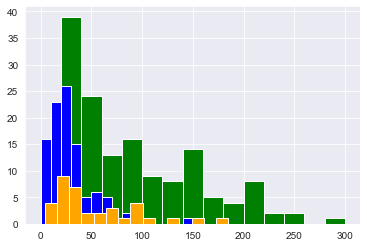

In [56]:
sns.set_style('darkgrid')
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15, color='Green')
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15, color='Blue')
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15, color='Orange')
plt.show()

#### Not stacked, but integrated

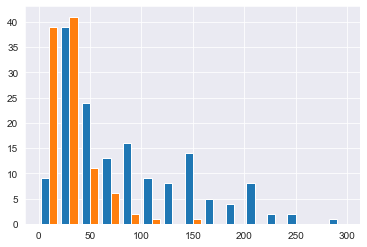

In [57]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
          movies[movies.Genre == 'Drama'].BudgetMillions], \
          bins=15)
plt.show()
#the histograms are no longer stacked but are still integrated on the same plot

#### Stacked vertically

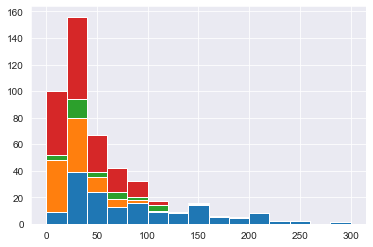

In [58]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions, \
          movies[movies.Genre == 'Comedy'].BudgetMillions], \
          bins=15, stacked=True)
plt.show()

#### Create a loop for Genres to make plotting easier

In [59]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [60]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [61]:
list1 = list()                            #create empty list. another method: list1 = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
print(list1)
#the first column in the printout is just the index - ignore it

[2       20
5      200
15      35
29      20
30      20
      ... 
531    130
542     35
546    150
547    160
557     24
Name: BudgetMillions, Length: 154, dtype: int64, 1      105
3       18
19     200
21      45
24      40
32      78
46      20
65      38
68     140
130     73
165     12
166    125
167    250
168    150
176     36
178    150
192     70
193     60
241     60
272     37
341     19
363     70
386    130
401    155
459     59
463     25
506     38
540    100
548     60
Name: BudgetMillions, dtype: int64, 0       8
4      20
6      30
8      28
9       8
       ..
552    80
553    22
554    50
555    18
558    80
Name: BudgetMillions, Length: 172, dtype: int64, 10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64, 7      32
12     35
20     40
28      5
59     26
88     10
97     25
100    30
103    50
109    20
126    40
135    19
137    30
160    20
161    15
175   

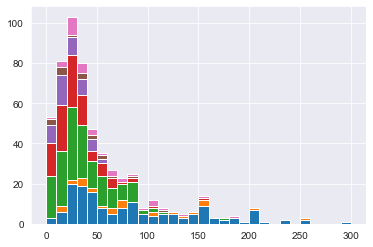

In [62]:
h = plt.hist(list1, bins=30, stacked=True)

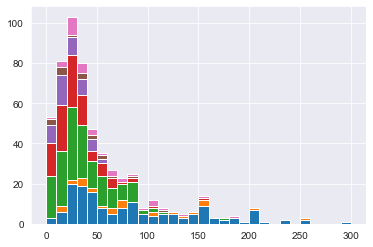

In [63]:
h = plt.hist(list1, bins=30, stacked=True, rwidth=1)    #rwidth - relative width of the bars as a fraction of the bin width

### Add Legend (Label)

### Chart #4 for report:

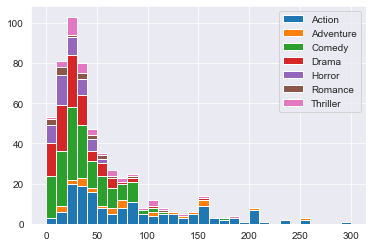

In [64]:
sns.set_style('darkgrid')
list1 = list()                            #create empty list. another method: list1 = []
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

---

## Kernel Density Estimate (KDE) Plots

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
https://seaborn.pydata.org/generated/seaborn.kdeplot.html

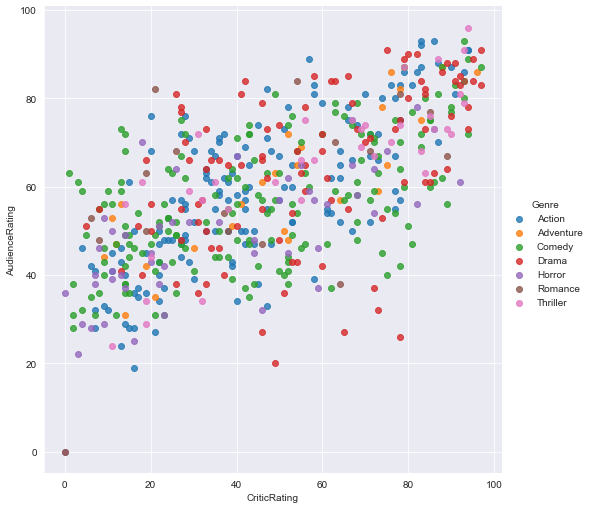

In [65]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                 fit_reg=False, hue='Genre', \
                 size=7, aspect=1)

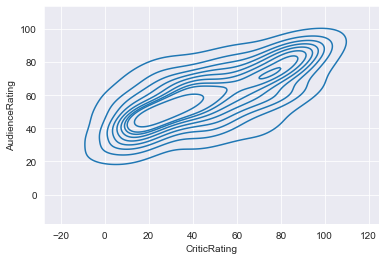

In [66]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

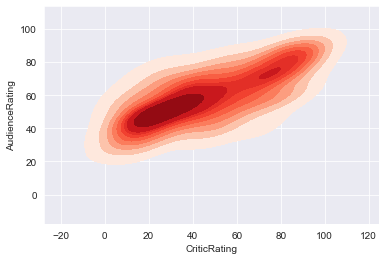

In [67]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, cmap='Reds')
#use shade_lowest=False to show grid if it's not already visible

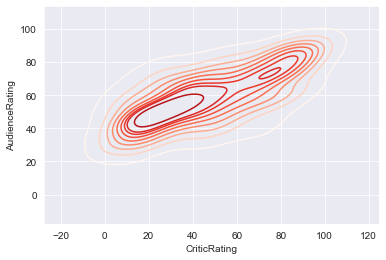

In [68]:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 cmap='Reds')

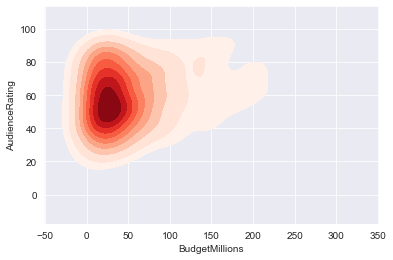

In [69]:
k1c = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade=True, cmap='Reds')

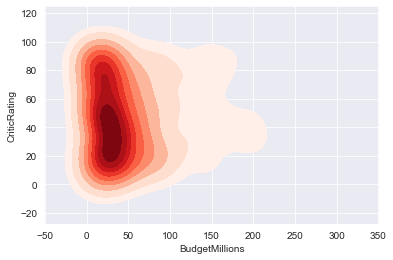

In [70]:
k1d = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 shade=True, cmap='Reds')

---

## Subplots()

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

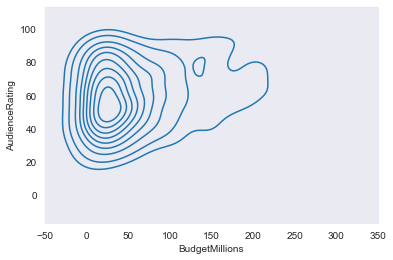

In [72]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

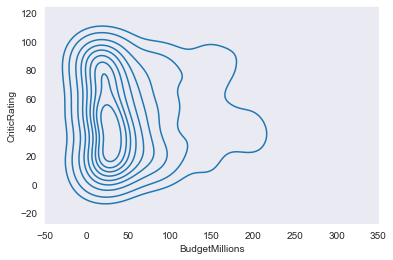

In [73]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-40.0, 240.0)]

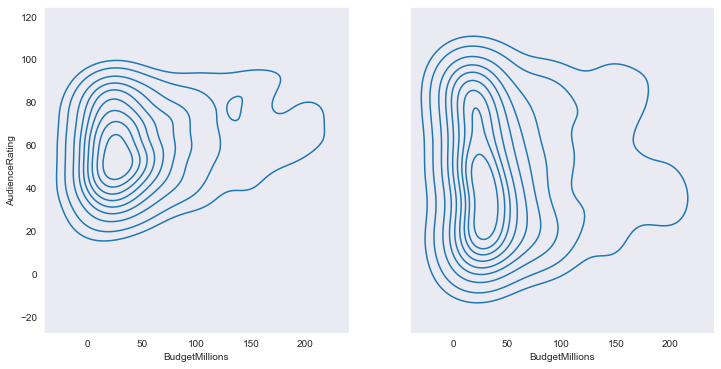

In [74]:
#f is the figure; ax refers to axes - the array that specifies the axes of the figure
f, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)    #1 row, 2 columns; figsize=(length, height)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[1])
k1.set(xlim=(-40,240))

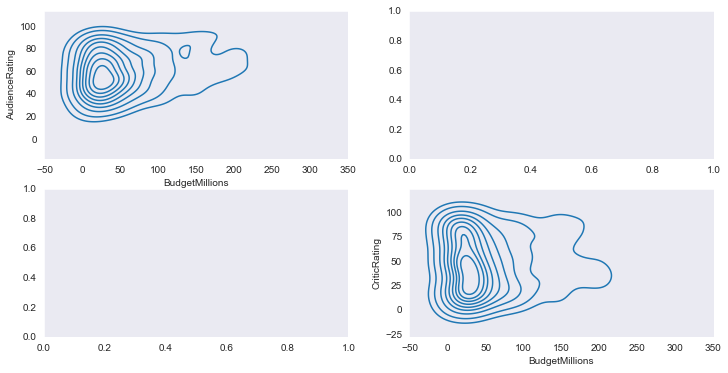

In [75]:
f, ax = plt.subplots(2, 2, figsize=(12,6))    #1 row, 2 columns; figsize=(length, height)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[1,1])

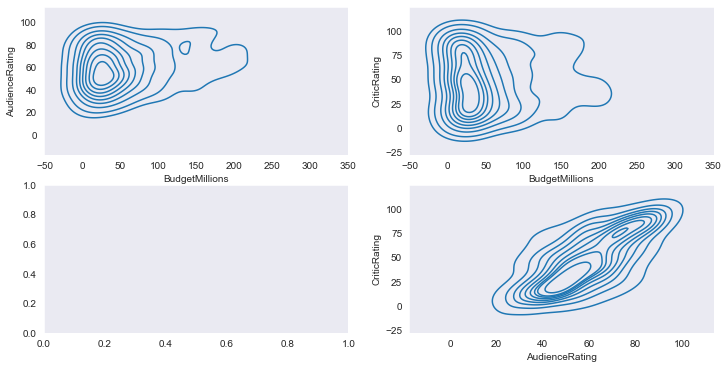

In [76]:
#f is the figure; ax refers to axes - the array that specifies the axes of the figure
f, ax = plt.subplots(2, 2, figsize=(12,6))    #1 row, 2 columns; figsize=(length, height)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[0,1])
k3 = sns.kdeplot(movies.AudienceRating, movies.CriticRating, ax=ax[1,1])

---

## Violinplots vs. Boxplots

#### Violinplots are required to have two columns - one categorical, one numeric

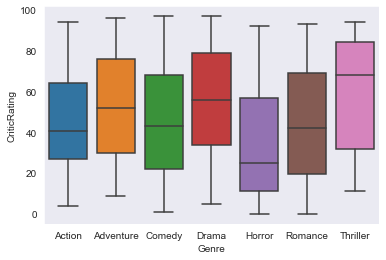

In [77]:
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

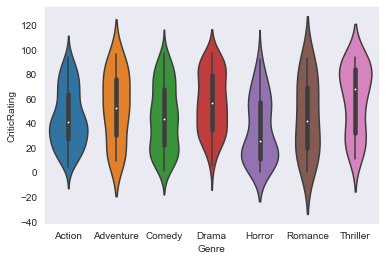

In [78]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

The width of violinplots tell you how many observations fall within that particular area

### Drama ratings over the years

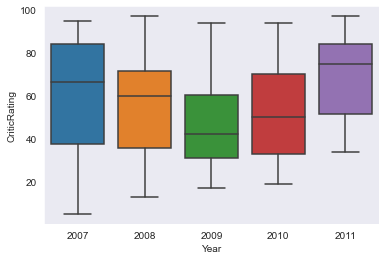

In [79]:
w2 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

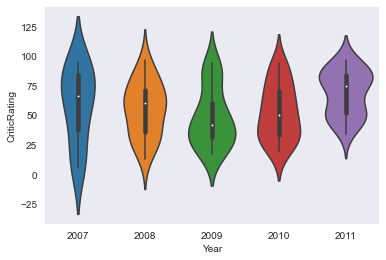

In [80]:
z2 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')
#violinplots can show you concentrates of observations

---

## Facet Grids

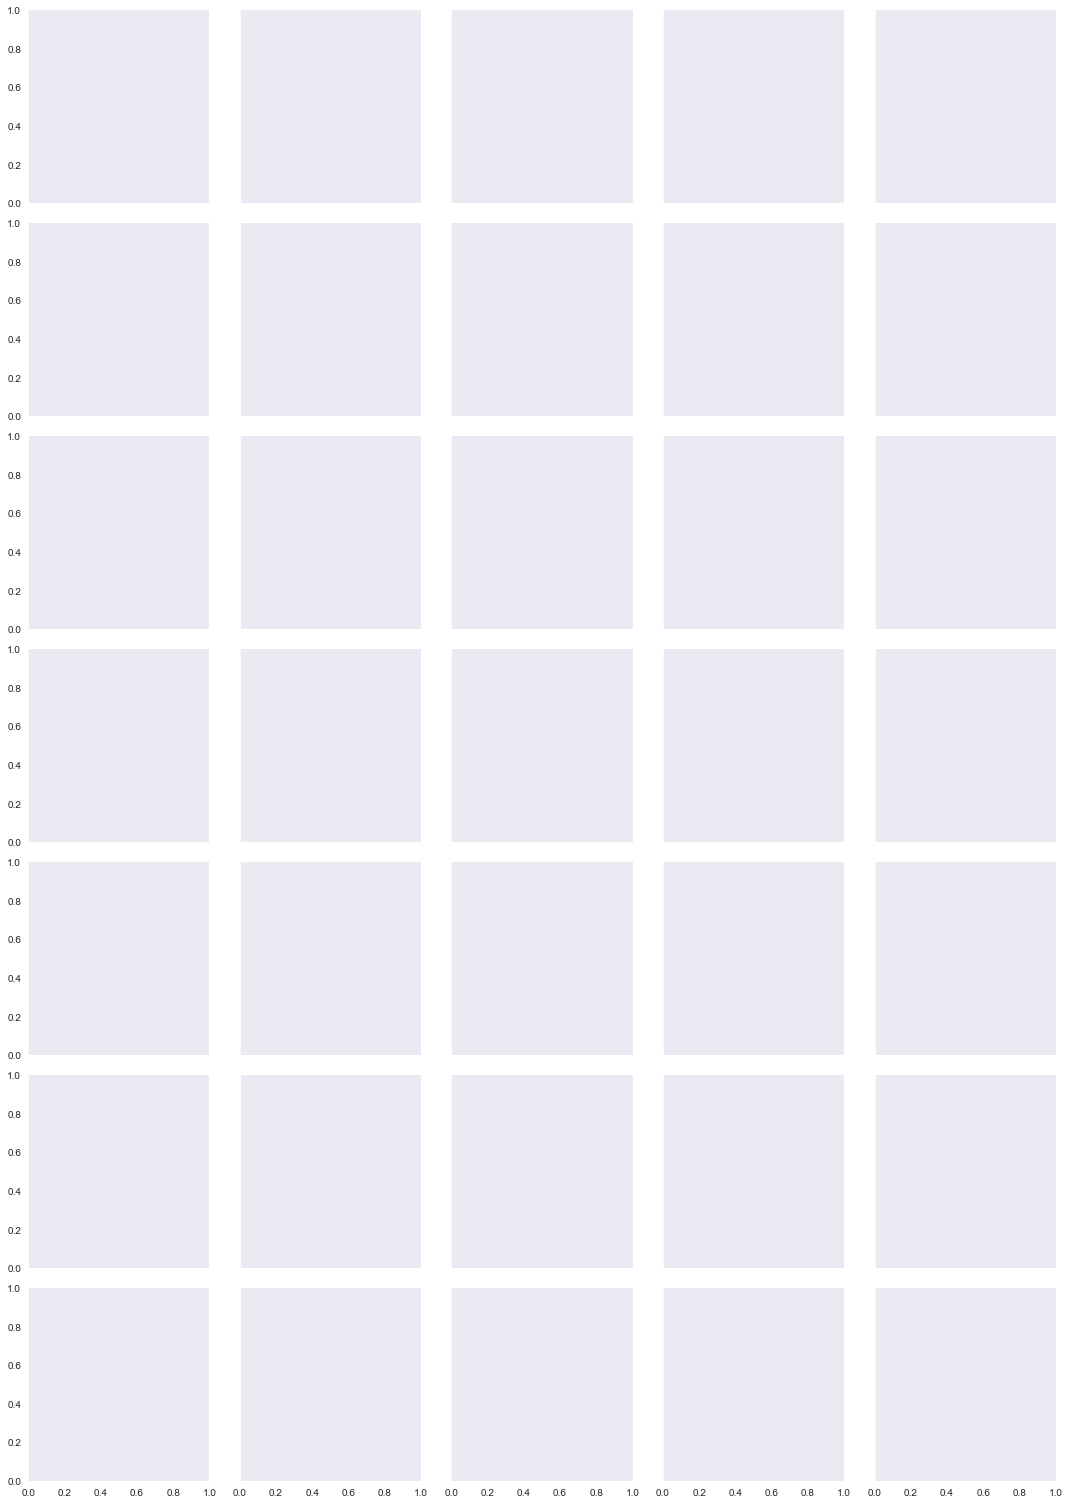

In [82]:
#g = sns.FacetGrid(movies, row='Genre', hue='Genre')
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

#### Pyplot Facet Grid Scatterplot

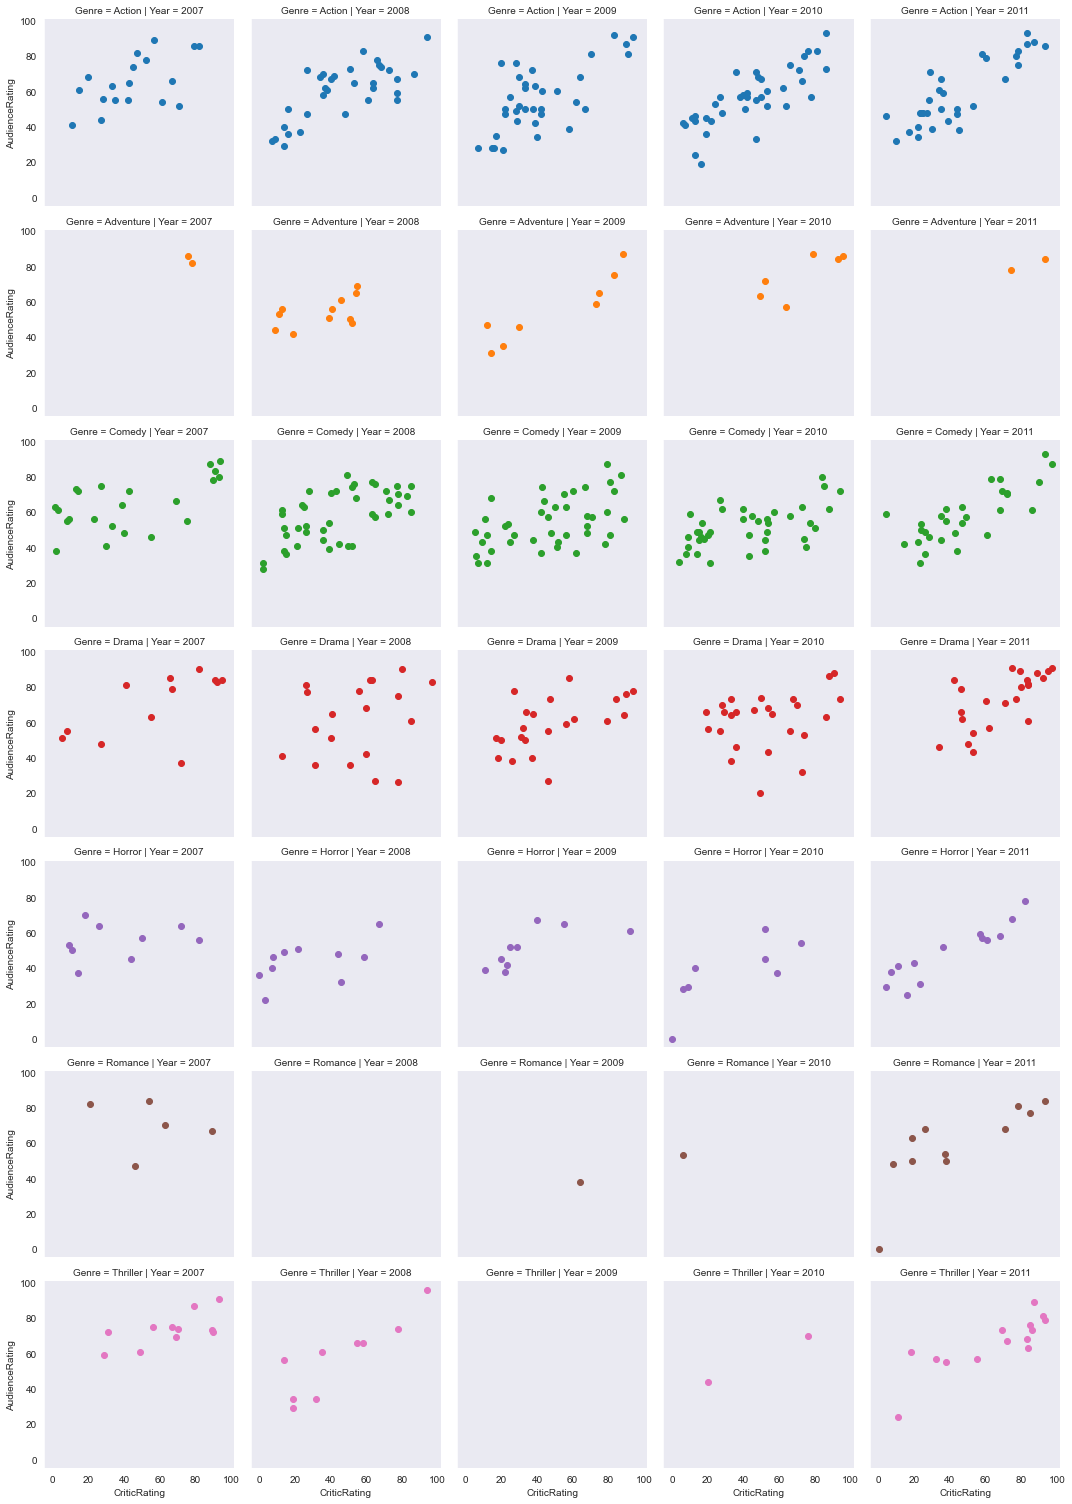

In [84]:
#Create the facet grid
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
#Map the function onto the facet grid
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')
#g = g.map(plt.scatter, movies.CriticRating, movies.AudienceRating)
#plt.scatter(movies.CriticRating, movies.AudienceRating)       #x=movies.CriticRating; y=movies.AudienceRating

#### Seaborn Facet Grid Scatterplot

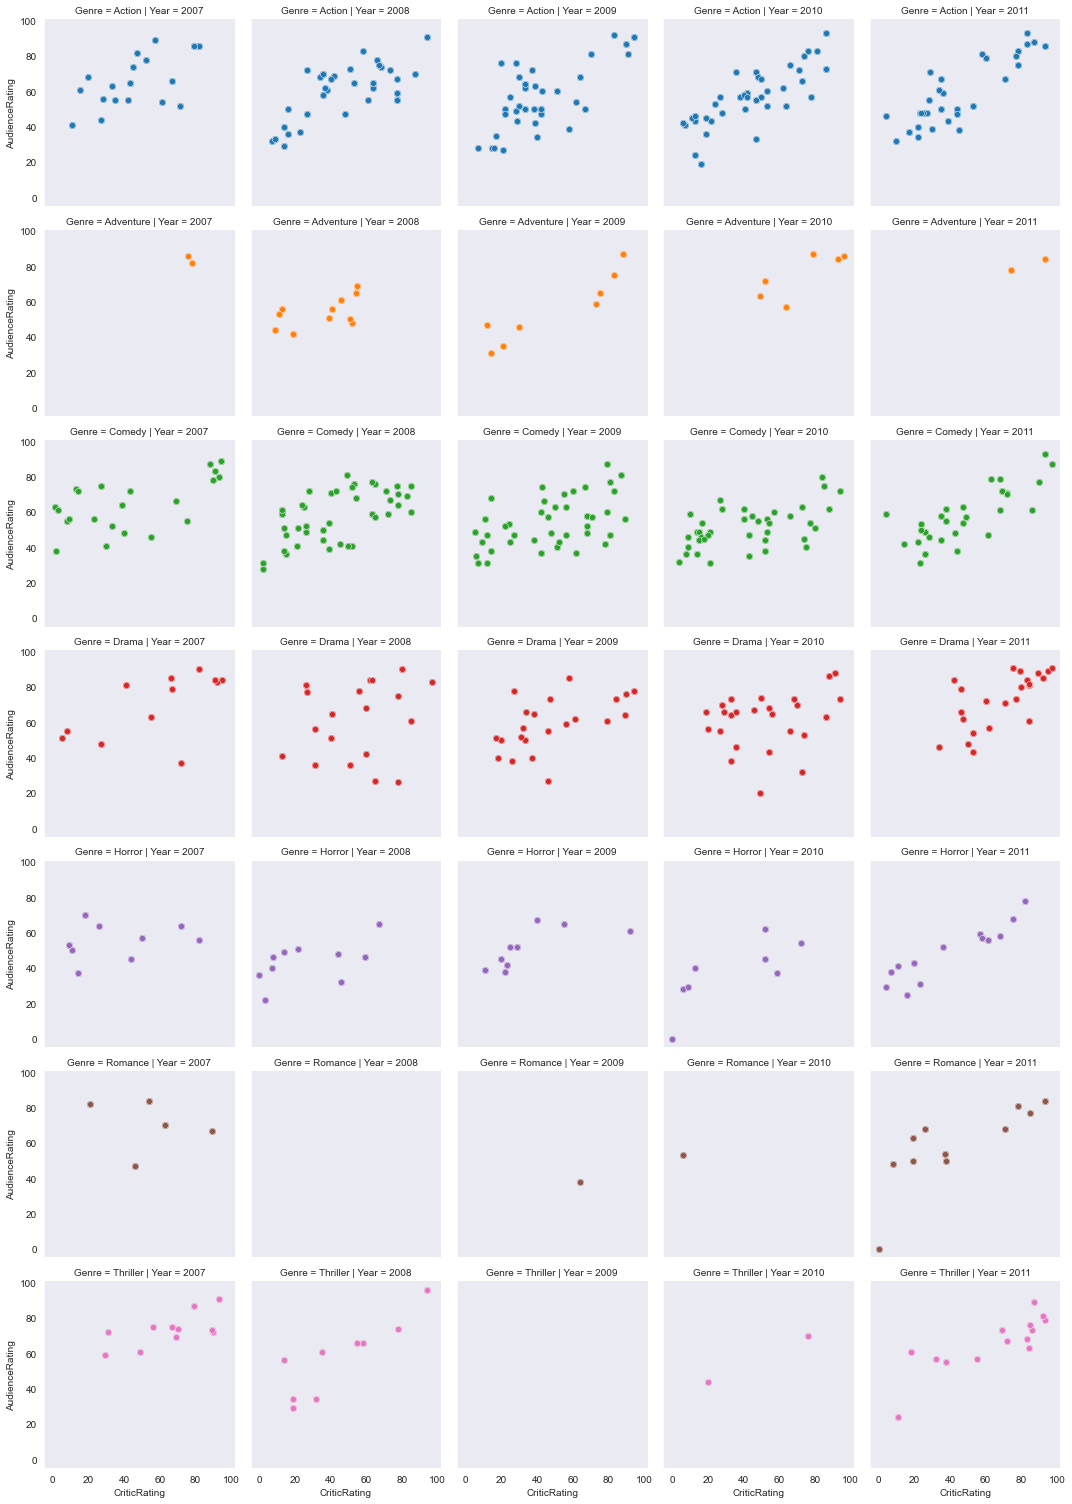

In [89]:
g2 = sns.FacetGrid(movies, row='Genre', col="Year")
g2 = g.map(sns.scatterplot, 'CriticRating', 'AudienceRating')

#### Pyplot Facet Grid Histogram

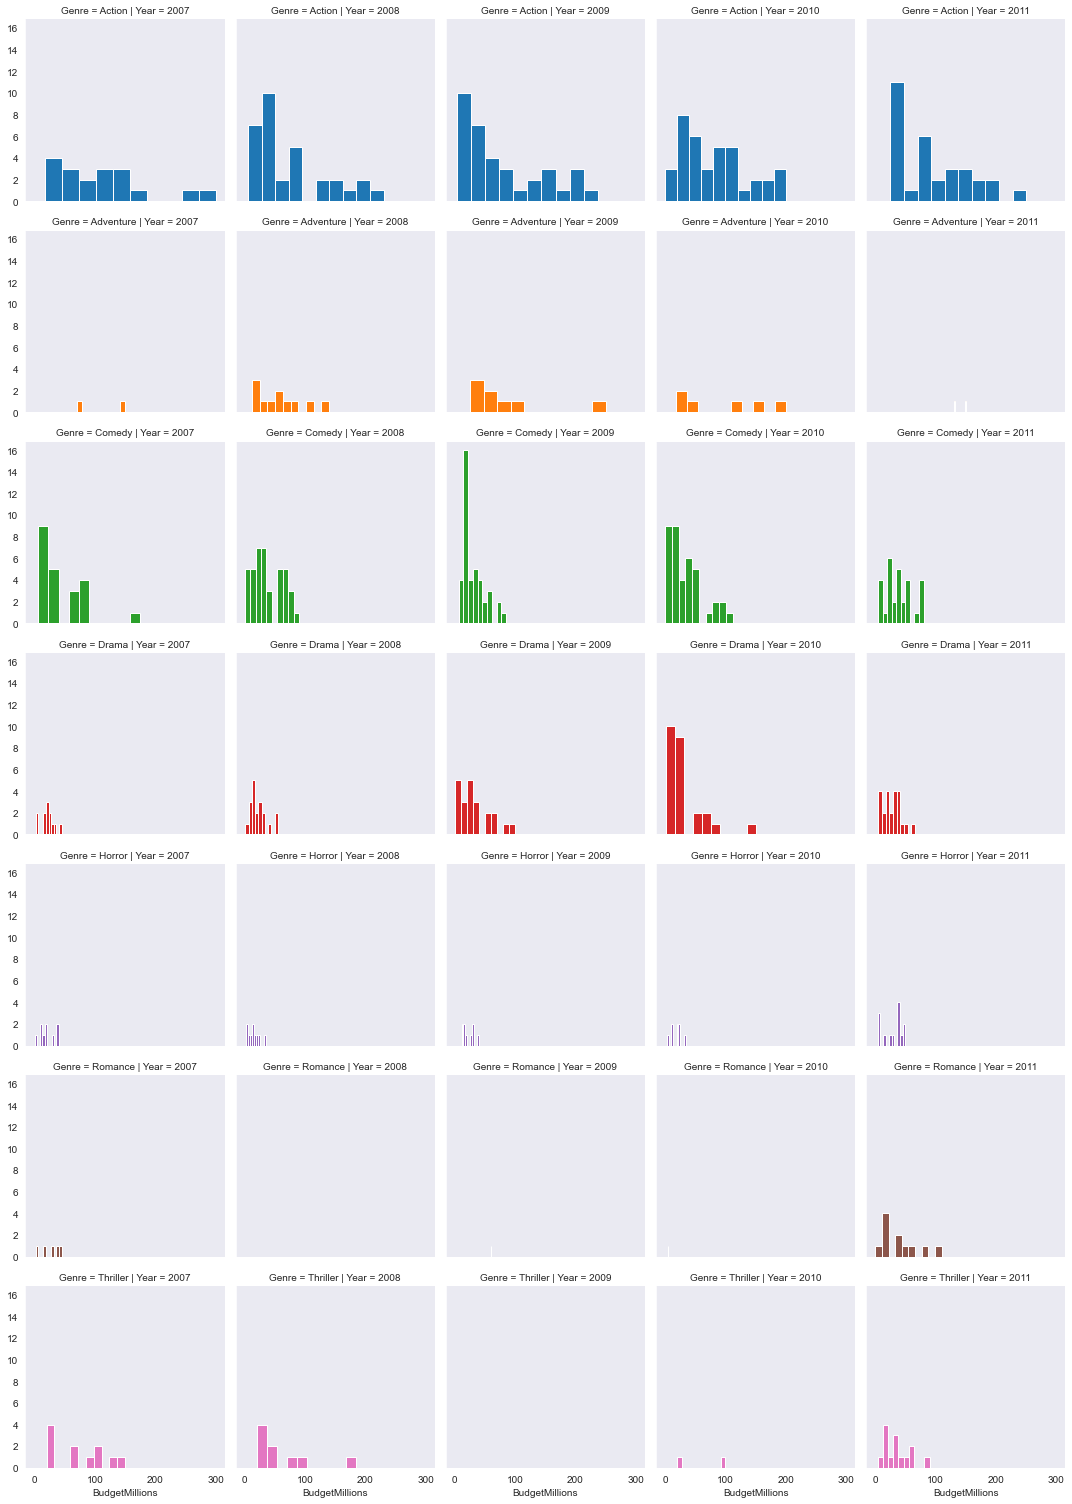

In [91]:
#can populate with any type of chart. Example: histograms
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

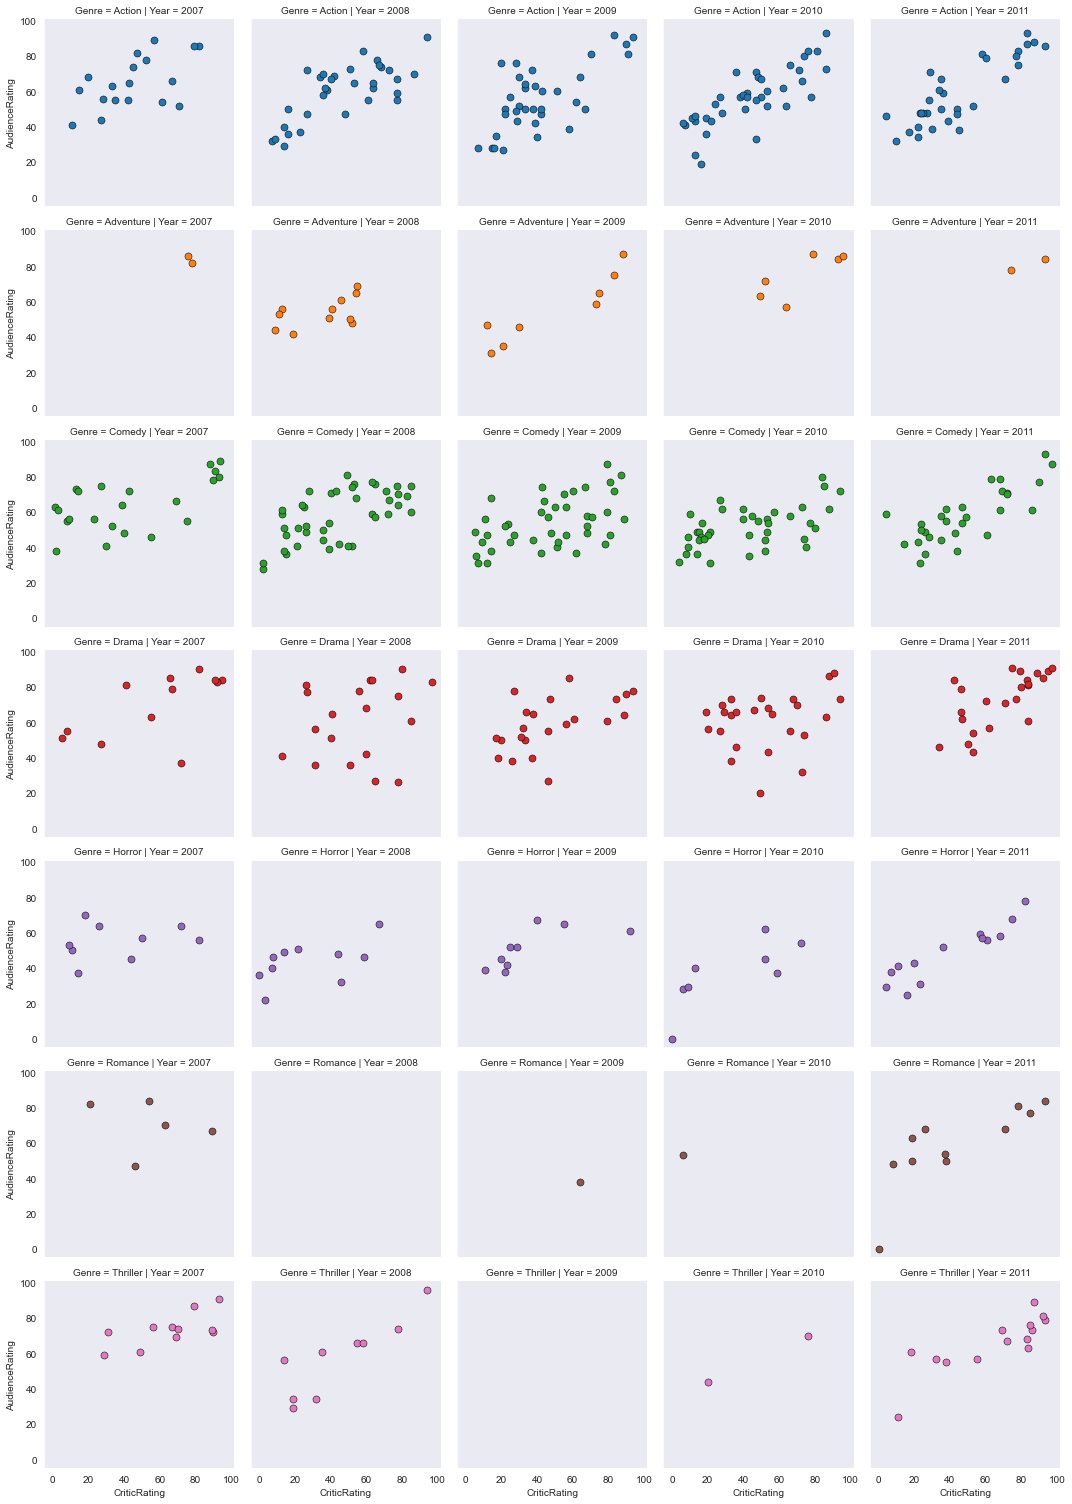

In [93]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

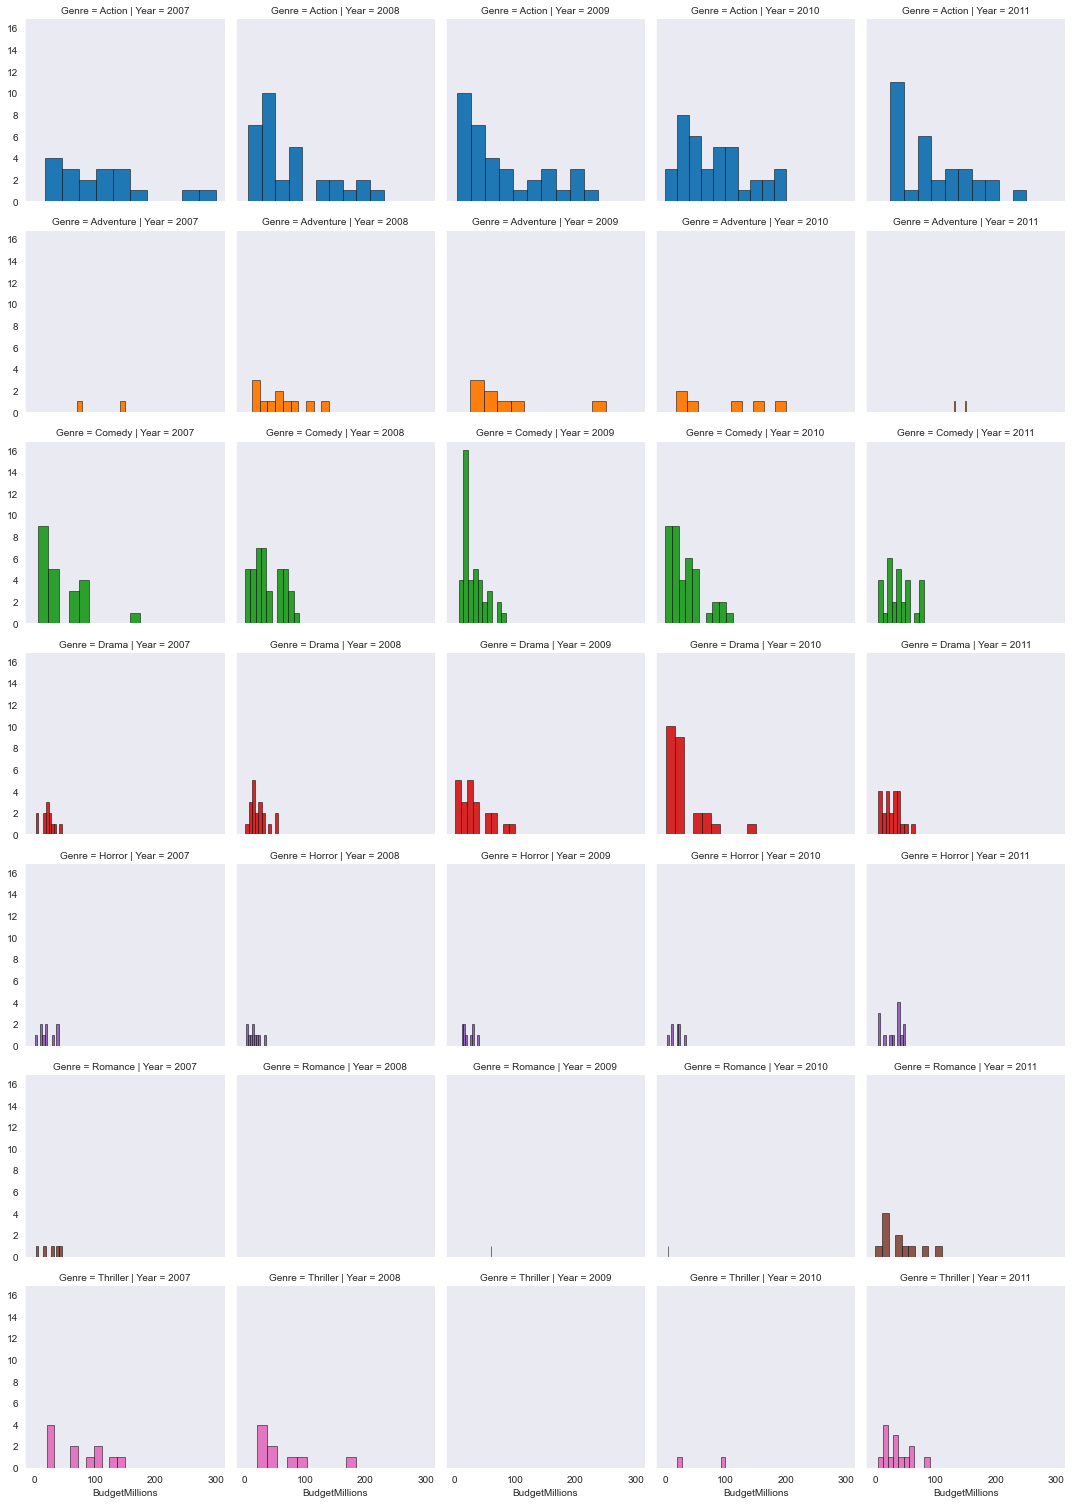

In [95]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(linewidth=0.5,edgecolor='black')
g = g.map(plt.hist, 'BudgetMillions', **kws)

---

## Coordinates and Diagonals

### Controlling Axes and Adding Diagonals

### Chart #5 for report:

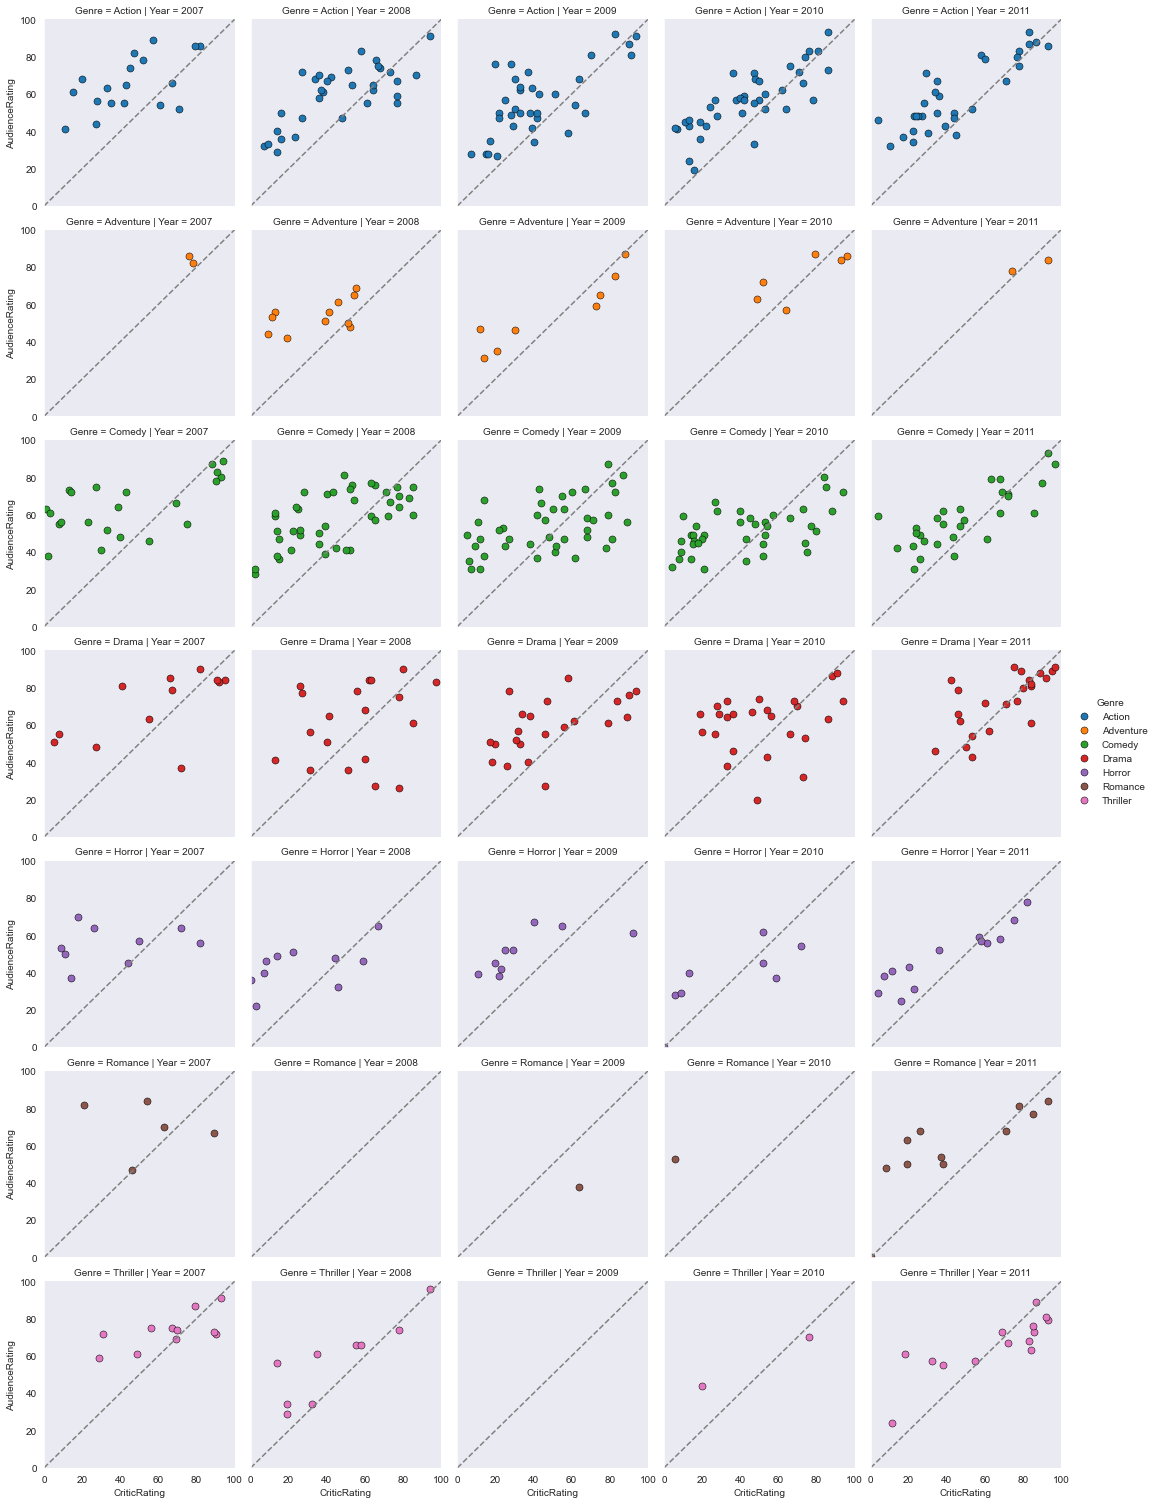

In [101]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()

---

## BONUS: Building Dashboards in Python

#### Dashboard - combination of charts/plots

In [102]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

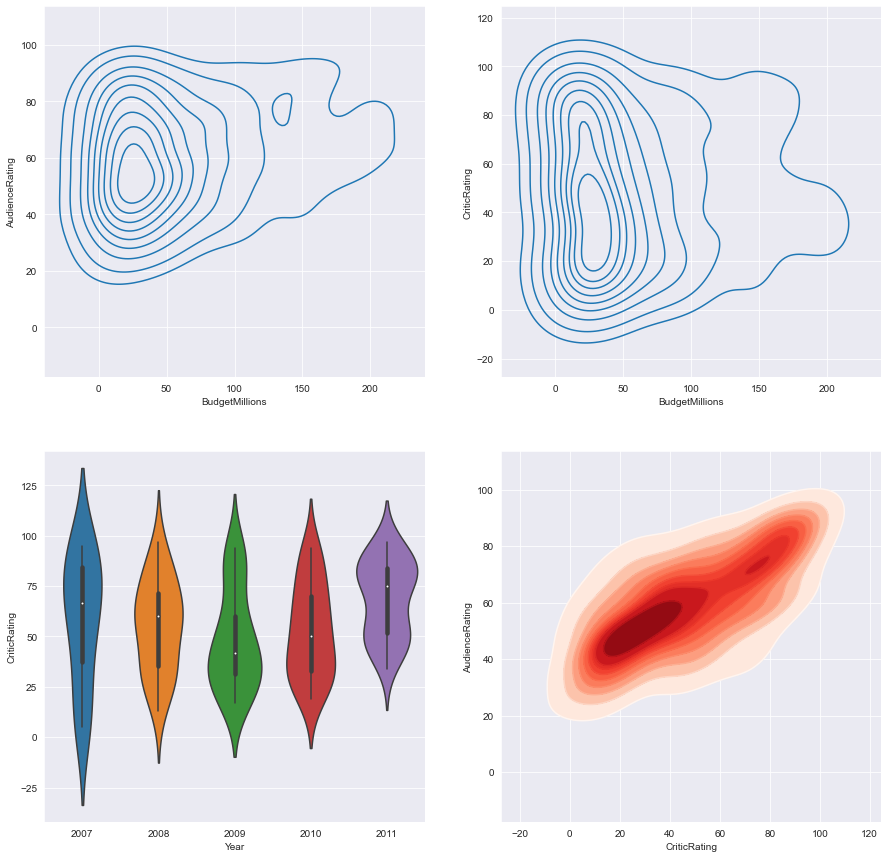

In [113]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2,2, figsize=(15,15))        #ax=axes
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])    #ax=axes
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[0,1])
k1.set(xlim=(-40,240))
k2.set(xlim=(-40,240))
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=ax[1,0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, cmap='Reds', ax=ax[1,1])
#k4b makes k4 less edgy, smoother edges
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 cmap='Reds', ax=ax[1,1])
plt.show()

#### Must change code if including a pyplot plot!

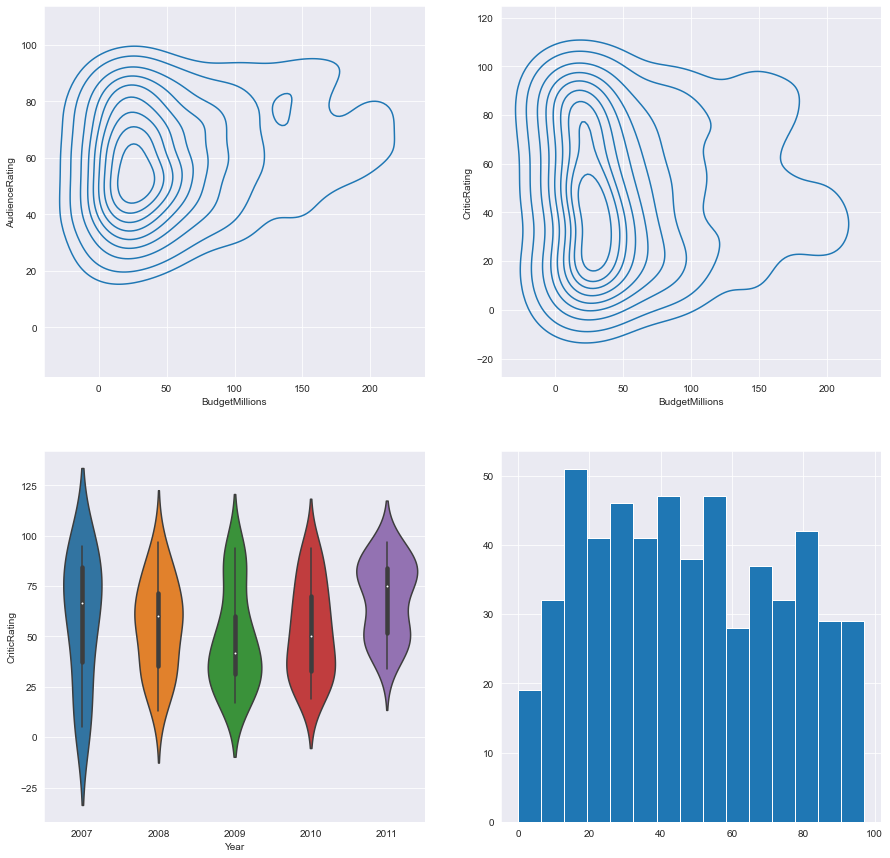

In [116]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2,2, figsize=(15,15))        #ax=axes
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])    #ax=axes
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[0,1])
k1.set(xlim=(-40,240))
k2.set(xlim=(-40,240))
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=ax[1,0])
#k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
#                 shade=True, cmap='Reds', ax=ax[1,1])
#k4b makes k4 less edgy, smoother edges
#k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
#                 cmap='Reds', ax=ax[1,1])
ax[1,1].hist(movies.CriticRating, bins=15)
#axes (ax) is a pyplot-generated object! So you can't use this method for Seaborn
plt.show()

---

## BONUS: Styling Tips

In [117]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

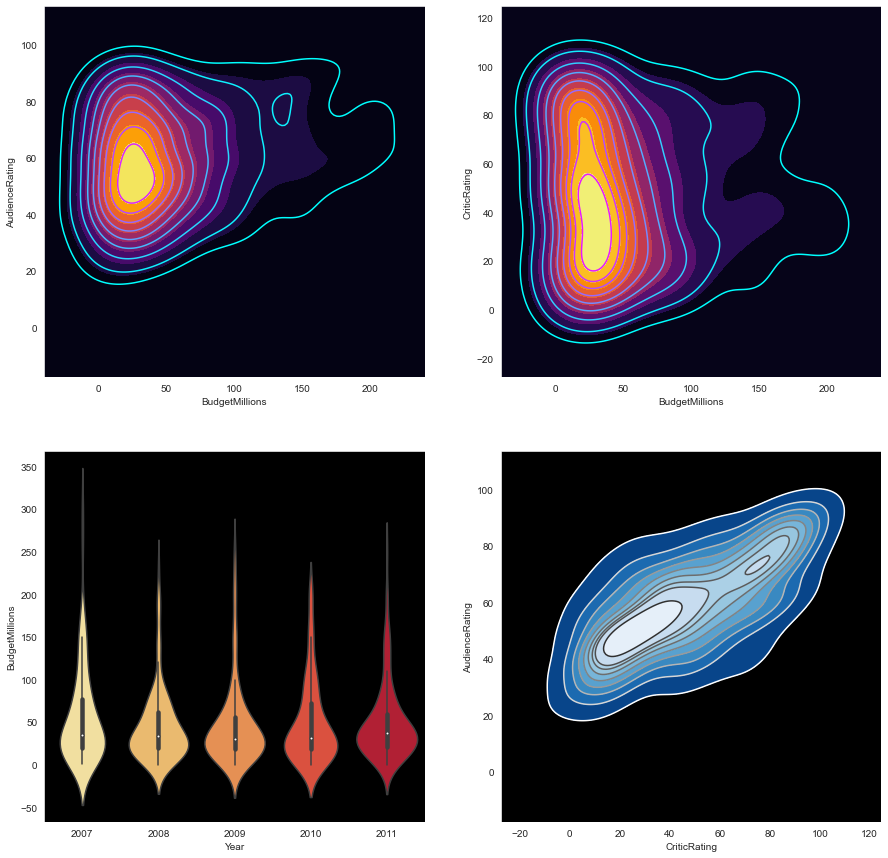

In [134]:
sns.set_style('dark', {'axes.facecolor': 'black'})    #white, whitegrid, dark, darkgrid, ticks
f, ax = plt.subplots(2,2, figsize=(15,15))        #ax=axes

#Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', ax=ax[0,0])    
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                  cmap='cool', ax=ax[0,0])                              
#k1b = outline for k1

#Plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 shade=True, shade_lowest=True, cmap='inferno', ax=ax[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 cmap='cool', ax=ax[0,1])
#k2b = outline for k2

#Plot [1,0]
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=ax[1,0], \
                  palette='YlOrRd')

#Plot [1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, cmap='Blues_r', ax=ax[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 cmap='gist_gray_r', ax=ax[1,1])

k1.set(xlim=(-40,240))
k2.set(xlim=(-40,240))
plt.show()

### Color map color options
Supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

---

## BONUS: Finishing Touches - Thematic Edits

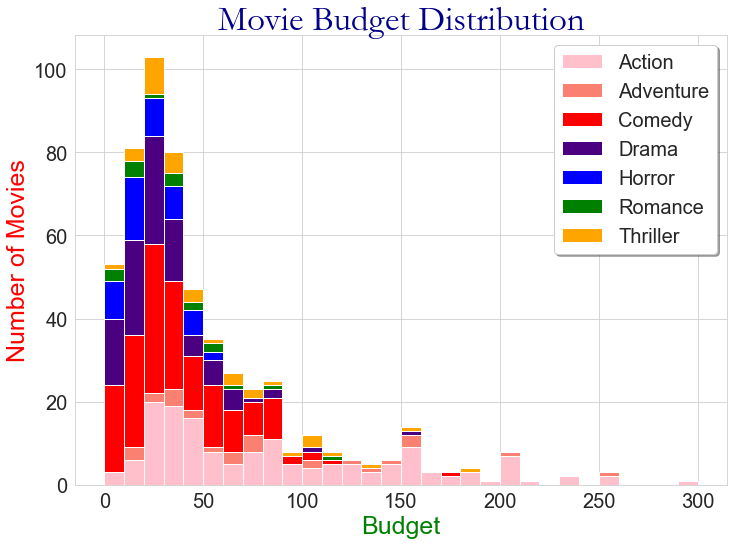

In [158]:
list1 = list()                            #create empty list. another method: list1 = []
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style('whitegrid')
fig, ax = plt.subplots()           #set it up as a subplot so you can easily change the size, etc.
fig.set_size_inches(11.7, 8.27)    #size of A4 paper
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels, \
             color={'Red', 'Salmon', 'Blue', 'Indigo', 'Orange', 'Pink','Green'})
plt.title('Movie Budget Distribution', fontsize=35, \
         color='DarkBlue', fontname='Garamond')
plt.ylabel('Number of Movies', fontsize=25, color="Red")
plt.xlabel('Budget', fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, \
           shadow=True, framealpha=1, prop={'size':20})    #prop changes the legend size; fancybox - rounded edges
plt.show()